In [2]:
import pandas as pd
from plotnine import *
df=pd.read_csv('../data/data.csv')

/var/folders/wx/k35tcjkd3mx16xkkmzntwzrc0000gn/T/ipykernel_40196/1565479527.py:3: DtypeWarning: Columns (18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.


In [10]:
gender_df=df.groupby(df['gender']).count()[['name']]
gender_df['percentage']=(gender_df['name']/gender_df['name'].sum()*100).round(1)
gender_df.rename(columns={'name':'count'},inplace=True)
gender_df.reset_index(inplace=True)
gender_df

,gender,count,percentage
0,female,13469,22.2
1,male,47200,77.8


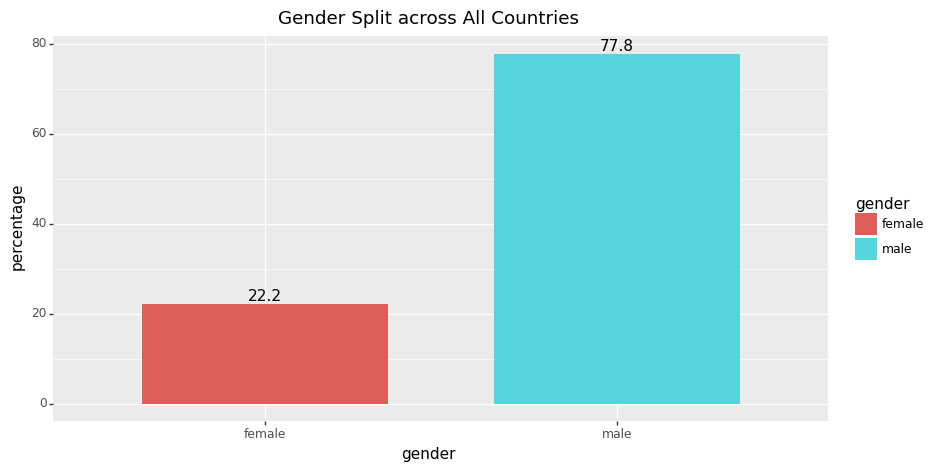

<ggplot: (8780458471590)>

In [32]:
ggplot(gender_df, aes(x='gender', y='percentage', fill='gender'))\
+ geom_bar(stat='identity', position='dodge', width=0.7)\
+ geom_text(aes(label='percentage'), position=position_dodge(width=0.7), va='bottom')\
+ labs(title='Gender Split across All Countries')\
+ theme(figure_size=(10,5,))

In [15]:
# G7 Country wise data
g7_countries=['Canada','France','Germany','Italy','Japan','United Kingdom','United States']
g7_df=df[df['country'].isin(g7_countries)]
g7_df

,Unnamed: 0,gender,id,identifiers,image,images,name,birth_date,links,other_names,...,contact_details,family_name,death_date,email,sort_name,honorific_prefix,honorific_suffix,national_identity,summary,patronymic_name
9080,0,male,00390221-a0ac-4cd6-8e3f-75ab374ade6d,"[{'identifier': 'chris-bittle', 'scheme': 'eve...",http://www.ourcommons.ca/Parliamentarians/Imag...,[{'url': 'http://www.ourcommons.ca/Parliamenta...,Chris Bittle,1979-02-17,"[{'note': 'Wikipedia (en)', 'url': 'https://en...",NaN,...,"[{'type': 'email', 'value': 'Chris.Bittle@parl...",Bittle,NaN,Chris.Bittle@parl.gc.ca,NaN,NaN,NaN,NaN,NaN,NaN
9081,1,male,0068ee69-6842-482c-9ffc-b7c67854ceef,"[{'identifier': 'chandra-arya', 'scheme': 'eve...",http://www.ourcommons.ca/Parliamentarians/Imag...,[{'url': 'http://www.ourcommons.ca/Parliamenta...,Chandra Arya,NaN,"[{'note': 'Wikipedia (en)', 'url': 'https://en...",NaN,...,"[{'type': 'email', 'value': 'Chandra.Arya@parl...",Arya,NaN,Chandra.Arya@parl.gc.ca,NaN,NaN,NaN,NaN,NaN,NaN
9082,2,male,00e911f6-0d61-467a-a96d-33257c7f0bf1,"[{'identifier': 'michael-chong', 'scheme': 'ev...",http://www.parl.gc.ca/Parliamentarians/Images/...,[{'url': 'http://www.parl.gc.ca/Parliamentaria...,Michael Chong,1971-11-22,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'ru', 'name': 'Майкл Чонг', 'note': ...",...,"[{'type': 'email', 'value': 'michael.chong@par...",Zhuang,NaN,michael.chong@parl.gc.ca,NaN,NaN,NaN,NaN,NaN,NaN
9083,3,female,0119354b-349e-44fe-b3fb-83c4aacf3829,"[{'identifier': 'francine-raynault', 'scheme':...",http://www.lop.parl.gc.ca/parlinfo/images/Pict...,[{'url': 'http://www.lop.parl.gc.ca/parlinfo/i...,Francine Raynault,1945-03-09,"[{'note': 'Wikipedia (en)', 'url': 'https://en...",NaN,...,NaN,RAYNAULT,NaN,NaN,"RAYNAULT, Francine",NaN,NaN,NaN,NaN,NaN
9084,4,male,0174b01d-0339-4e06-a595-f0e4a6623431,"[{'identifier': 'rodney-weston', 'scheme': 'ev...",http://www.lop.parl.gc.ca/parlinfo/images/Pict...,[{'url': 'http://www.lop.parl.gc.ca/parlinfo/i...,Rodney Weston,1964-03-28,"[{'note': 'Wikipedia (ar)', 'url': 'https://ar...","[{'lang': 'ar', 'name': 'رودني ويستون', 'note'...",...,"[{'type': 'twitter', 'value': 'rodneywestonsj'}]",WESTON,NaN,NaN,"WESTON, Rodney",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74061,1432,female,ffb68602-aba5-483d-b8da-94d9060be2f3,"[{'identifier': '10024', 'scheme': 'everypolit...",NaN,NaN,Jackie Ballard,1953-01-04,"[{'note': 'Wikipedia (en)', 'url': 'https://en...",NaN,...,NaN,Ballard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74062,1433,female,ffd1c1e2-82a4-4e1b-a522-859cff7f372f,"[{'identifier': '4126', 'scheme': 'datadotparl...",https://candidates.democracyclub.org.uk/media/...,[{'url': 'https://candidates.democracyclub.org...,Mary Glindon,1957-01-13,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'ja', 'name': 'メアリー・グリンドン', 'note': ...",...,"[{'type': 'email', 'value': 'mary.glindon.mp@p...",NaN,NaN,mary.glindon.mp@parliament.uk,"Glindon, Mary",NaN,NaN,NaN,NaN,NaN
74063,1434,male,ffdfc5f1-332b-4919-9452-571c01ce8c7a,"[{'identifier': '921', 'scheme': 'europarlmep'...",NaN,NaN,Richard Caborn,1943-10-06,"[{'note': 'Wikipedia (en)', 'url': 'https://en...","[{'lang': 'ko', 'name': '리처드 카본', 'note': 'mul...",...,NaN,NaN,NaN,NaN,NaN,The Right Honourable,NaN,NaN,NaN,NaN
74064,1435,male,ffe205c2-7ba4-4512-9f04-66f9665da733,"[{'identifier': '25774', 'scheme': 'bbc_democr...",https://candidates.democracyclub.org.uk/media/...,[{'url': 'https://candidates.democracyclub.org...,Graham Allen,1953-01-11,"[{'note': 'Wikipedia (ar)', 'url': 'https://ar...","[{'lang': 'ar', 'name': 'غراهام ألين', 'note':...",...,"[{'type': 'twitter', 'value': 'GrahamAllenMPX'}]",Allen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
g7_gender_df=g7_df.groupby(g7_df['gender']).count()[['name']]
g7_gender_df['percentage']=(g7_gender_df['name']/g7_gender_df['name'].sum()*100).round(1)
g7_gender_df.rename(columns={'name':'count'},inplace=True)
g7_gender_df.reset_index(inplace=True)
g7_gender_df

,gender,count,percentage
0,female,2300,24.2
1,male,7206,75.8


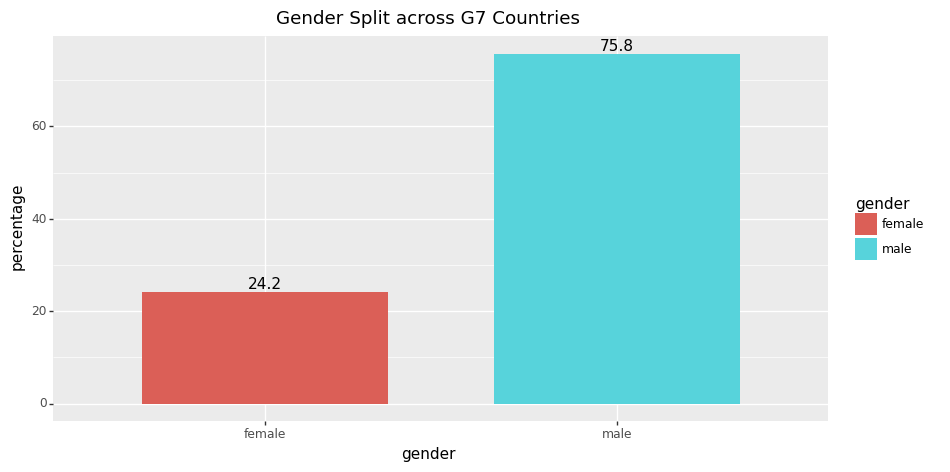

<ggplot: (8780458662919)>

In [33]:
ggplot(g7_gender_df, aes(x='gender', y='percentage', fill='gender'))\
+ geom_bar(stat='identity', position='dodge', width=0.7)\
+ geom_text(aes(label='percentage'), position=position_dodge(width=0.7), va='bottom')\
+ labs(title='Gender Split across G7 Countries')\
+ theme(figure_size=(10,5,))

In [22]:
# UK only data
uk_df=df[df['country']=='United Kingdom']
uk_gender_df=uk_df.groupby(uk_df['gender']).count()[['name']]
uk_gender_df['percentage']=(uk_gender_df['name']/uk_gender_df['name'].sum()*100).round(1)
uk_gender_df.rename(columns={'name':'count'},inplace=True)
uk_gender_df.reset_index(inplace=True)
uk_gender_df

# Currently this sits at 35% in house of commons and 29% in house of lords

,gender,count,percentage
0,female,374,26.0
1,male,1063,74.0


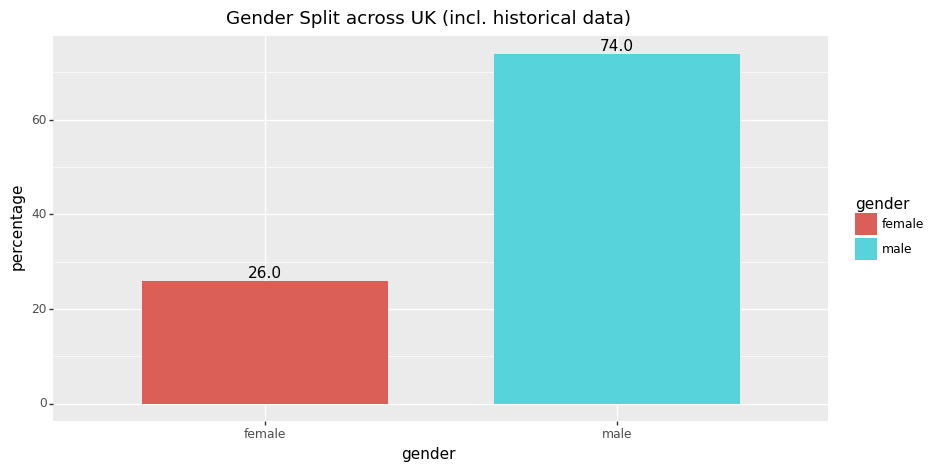

<ggplot: (8780360263153)>

In [34]:
ggplot(uk_gender_df, aes(x='gender', y='percentage', fill='gender'))\
+ geom_bar(stat='identity', position='dodge', width=0.7)\
+ geom_text(aes(label='percentage'), position=position_dodge(width=0.7), va='bottom')\
+ labs(title='Gender Split across UK (incl. historical data)')\
+ theme(figure_size=(10,5,))

In [28]:
# Top 5 Highest HDI countries
Top_5_HDI_countries=['Switzerland','Norway','Iceland','Hong Kong','Australia']
H_HDI_df=df[df['country'].isin(Top_5_HDI_countries)]
H_HDI_df
H_HDI_gender_df=H_HDI_df.groupby(H_HDI_df['gender']).count()[['name']]
H_HDI_gender_df['percentage']=(H_HDI_gender_df['name']/H_HDI_gender_df['name'].sum()*100).round(1)
H_HDI_gender_df.rename(columns={'name':'count'},inplace=True)
H_HDI_gender_df.reset_index(inplace=True)
H_HDI_gender_df


,gender,count,percentage
0,female,838,23.5
1,male,2725,76.5


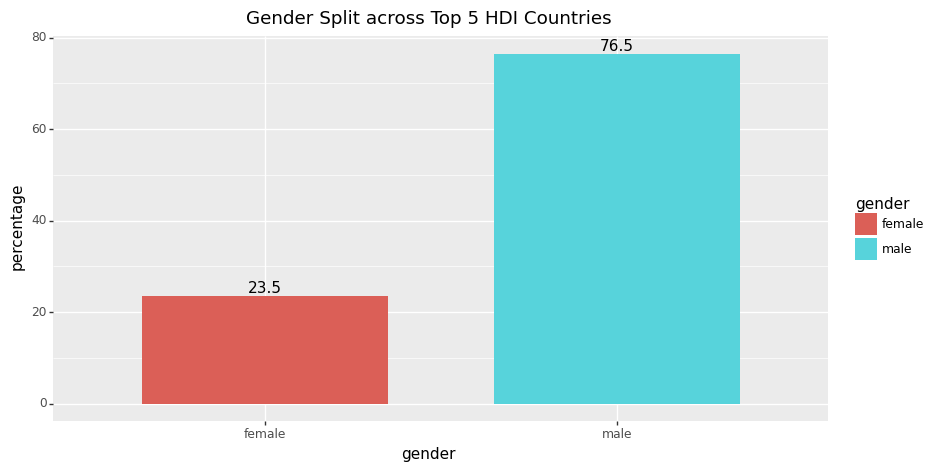

<ggplot: (8780458464142)>

In [35]:
ggplot(H_HDI_gender_df, aes(x='gender', y='percentage', fill='gender'))\
+ geom_bar(stat='identity', position='dodge', width=0.7)\
+ geom_text(aes(label='percentage'), position=position_dodge(width=0.7), va='bottom')\
+ labs(title='Gender Split across Top 5 HDI Countries')\
+ theme(figure_size=(10,5,))

In [30]:
# Top 5 lowest HDI countries
Top_5_Lowest_HDI_countries=['South Sudan','Chad','Niger','Central African Republic','Burundi']
L_HDI_df=df[df['country'].isin(Top_5_Lowest_HDI_countries)]
L_HDI_df
L_HDI_gender_df=L_HDI_df.groupby(L_HDI_df['gender']).count()[['name']]
L_HDI_gender_df['percentage']=(L_HDI_gender_df['name']/L_HDI_gender_df['name'].sum()*100).round(1)
L_HDI_gender_df.rename(columns={'name':'count'},inplace=True)
L_HDI_gender_df.reset_index(inplace=True)
L_HDI_gender_df


,gender,count,percentage
0,female,59,24.4
1,male,183,75.6


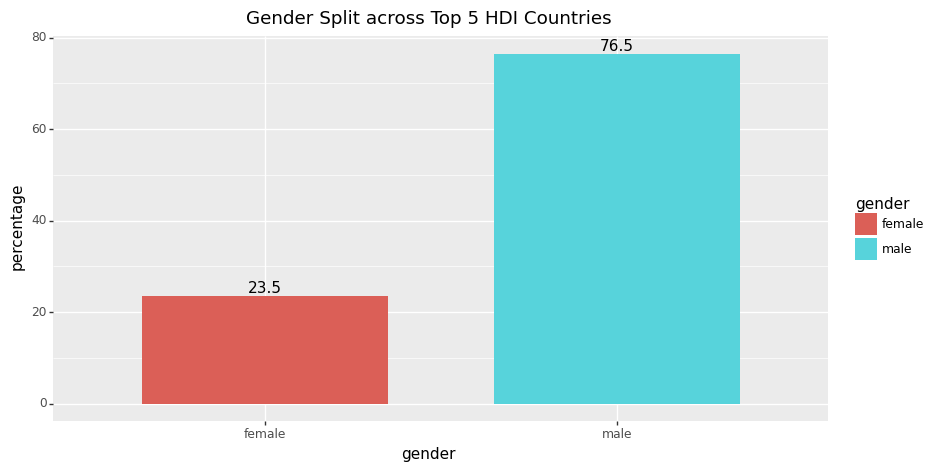

<ggplot: (8780406508484)>

In [36]:
ggplot(H_HDI_gender_df, aes(x='gender', y='percentage', fill='gender'))\
+ geom_bar(stat='identity', position='dodge', width=0.7)\
+ geom_text(aes(label='percentage'), position=position_dodge(width=0.7), va='bottom')\
+ labs(title='Gender Split across Top 5 HDI Countries')\
+ theme(figure_size=(10,5,))

## Analysis with indices

Gender inequality index, HDI, Income category, V-Dem score, Quotas

In [52]:
import utils

# Gender inequality index (GII)

top_gii=df.query('country in @utils.top_gii')
bottom_gii=df.query('country in @utils.bottom_gii')
top_gii_df=top_gii.groupby('gender').count()[['name']]
bottom_gii_df=bottom_gii.groupby('gender').count()[['name']]
gender_df=pd.merge(top_gii_df, bottom_gii_df, how='inner',left_index=True,right_index=True)
gender_df.columns=['top_gii','bottom_gii']

# Add columns for percentage
gender_df['top_gii_pc']=(gender_df['top_gii']/gender_df['top_gii'].sum()*100).round(2)
gender_df['bottom_gii_pc']=(gender_df['bottom_gii']/gender_df['bottom_gii'].sum()*100).round(2)
gender_df

,top_gii,bottom_gii,top_gii_pc,bottom_gii_pc
gender,,,,
female,202,4356,11.08,28.21
male,1621,11087,88.92,71.79


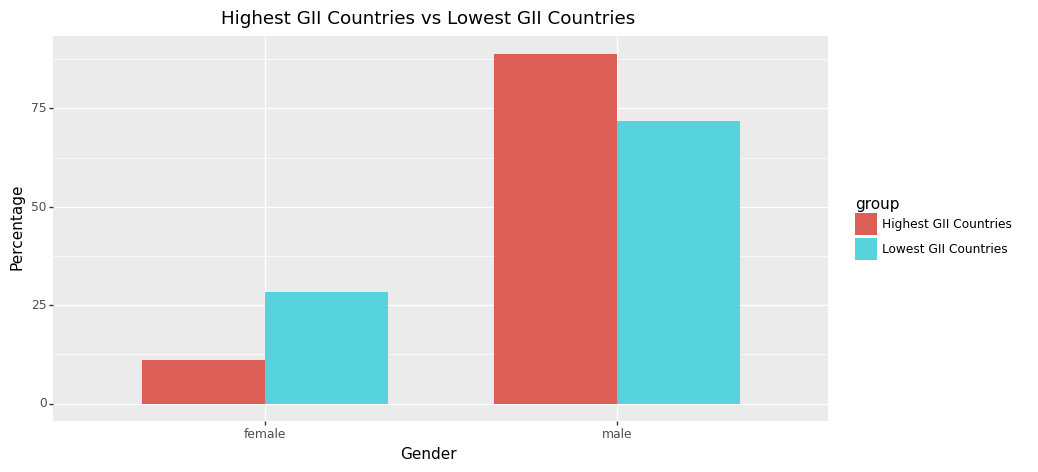

<ggplot: (8780360908966)>

In [53]:
# Create a double bar plot for Gender Inequality Index analysis
gii_plot_df=pd.concat([gender_df[['top_gii_pc']].rename(columns={'top_gii_pc':'percentage'})\
                   ,gender_df[['bottom_gii_pc']].rename(columns={'bottom_gii_pc':'percentage'})],axis=0).reset_index()
gii_plot_df['group']=['Highest GII Countries' if i<2 else 'Lowest GII Countries' for i in range(4)]
ggplot(gii_plot_df,aes(x='gender',y='percentage',fill='group'))\
    + geom_bar(stat='identity', position='dodge', width=0.7) \
    + labs(x='Gender', y='Percentage', title='Highest GII Countries vs Lowest GII Countries') \
    + theme(figure_size=(10, 5))

In [54]:
# HDI

high_hdi=df.query('country in @utils.high_hdi')
low_hdi=df.query('country in @utils.low_hdi')
high_hdi_df=high_hdi.groupby('gender').count()[['name']]
low_hdi_df=low_hdi.groupby('gender').count()[['name']]
gender_df=pd.merge(high_hdi_df, low_hdi_df, how='inner',left_index=True,right_index=True)
gender_df.columns=['high_hdi','low_hdi']

# Add columns for percentage
gender_df['high_hdi_pc']=(gender_df['high_hdi']/gender_df['high_hdi'].sum()*100).round(2)
gender_df['low_hdi_pc']=(gender_df['low_hdi']/gender_df['low_hdi'].sum()*100).round(2)
gender_df

,high_hdi,low_hdi,high_hdi_pc,low_hdi_pc
gender,,,,
female,7452,1797,22.16,20.97
male,26171,6774,77.84,79.03


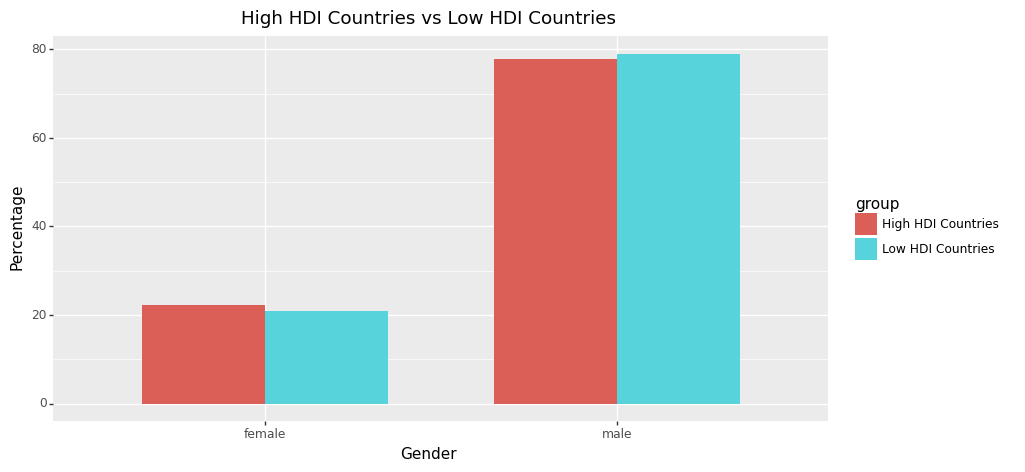

<ggplot: (8780391204596)>

In [55]:
# Create a double bar plot for HDI analysis
hdi_plot_df=pd.concat([gender_df[['high_hdi_pc']].rename(columns={'high_hdi_pc':'percentage'})\
                   ,gender_df[['low_hdi_pc']].rename(columns={'low_hdi_pc':'percentage'})],axis=0).reset_index()
hdi_plot_df['group']=['High HDI Countries' if i<2 else 'Low HDI Countries' for i in range(4)]
ggplot(hdi_plot_df,aes(x='gender',y='percentage',fill='group'))\
    + geom_bar(stat='identity', position='dodge', width=0.7) \
    + labs(x='Gender', y='Percentage', title='High HDI Countries vs Low HDI Countries') \
    + theme(figure_size=(10, 5))

In [56]:
# V-Dem

high_vdem=df.query('country in @utils.high_dem')
low_vdem=df.query('country in @utils.low_dem')
high_vdem_df=high_vdem.groupby('gender').count()[['name']]
low_vdem_df=low_vdem.groupby('gender').count()[['name']]
gender_df=pd.merge(high_vdem_df, low_vdem_df, how='inner',left_index=True,right_index=True)
gender_df.columns=['high_vdem','low_vdem']

# Add columns for percentage
gender_df['high_vdem_pc']=(gender_df['high_vdem']/gender_df['high_vdem'].sum()*100).round(2)
gender_df['low_vdem_pc']=(gender_df['low_vdem']/gender_df['low_vdem'].sum()*100).round(2)
gender_df

,high_vdem,low_vdem,high_vdem_pc,low_vdem_pc
gender,,,,
female,5903,2955,26.83,20.09
male,16095,11751,73.17,79.91


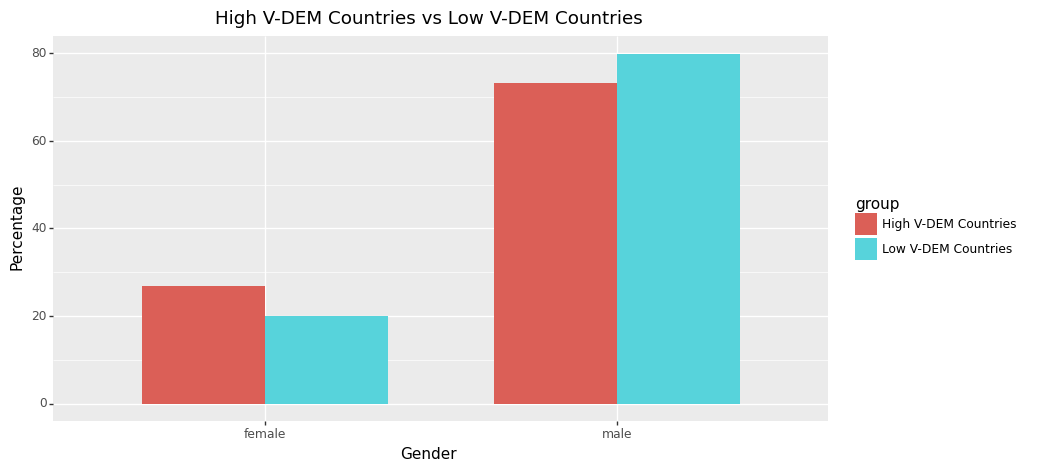

<ggplot: (8780391160980)>

In [59]:
# Create a double bar plot for V-DEM analysis
vdem_plot_df=pd.concat([gender_df[['high_vdem_pc']].rename(columns={'high_vdem_pc':'percentage'})\
                   ,gender_df[['low_vdem_pc']].rename(columns={'low_vdem_pc':'percentage'})],axis=0).reset_index()
vdem_plot_df['group']=['High V-DEM Countries' if i<2 else 'Low V-DEM Countries' for i in range(4)]
ggplot(vdem_plot_df,aes(x='gender',y='percentage',fill='group'))\
    + geom_bar(stat='identity', position='dodge', width=0.7) \
    + labs(x='Gender', y='Percentage', title='High V-DEM Countries vs Low V-DEM Countries') \
    + theme(figure_size=(10, 5))

In [60]:
# Income Category

high_income=df.query('country in @utils.high_income')
low_income=df.query('country in @utils.low_income')
high_income_df=high_income.groupby('gender').count()[['name']]
low_income_df=low_income.groupby('gender').count()[['name']]
gender_df=pd.merge(high_income_df, low_income_df, how='inner',left_index=True,right_index=True)
gender_df.columns=['high_income','low_income']

# Add columns for percentage
gender_df['high_income_pc']=(gender_df['high_income']/gender_df['high_income'].sum()*100).round(2)
gender_df['low_income_pc']=(gender_df['low_income']/gender_df['low_income'].sum()*100).round(2)
gender_df

,high_income,low_income,high_income_pc,low_income_pc
gender,,,,
female,6891,585,24.57,25.59
male,21151,1701,75.43,74.41


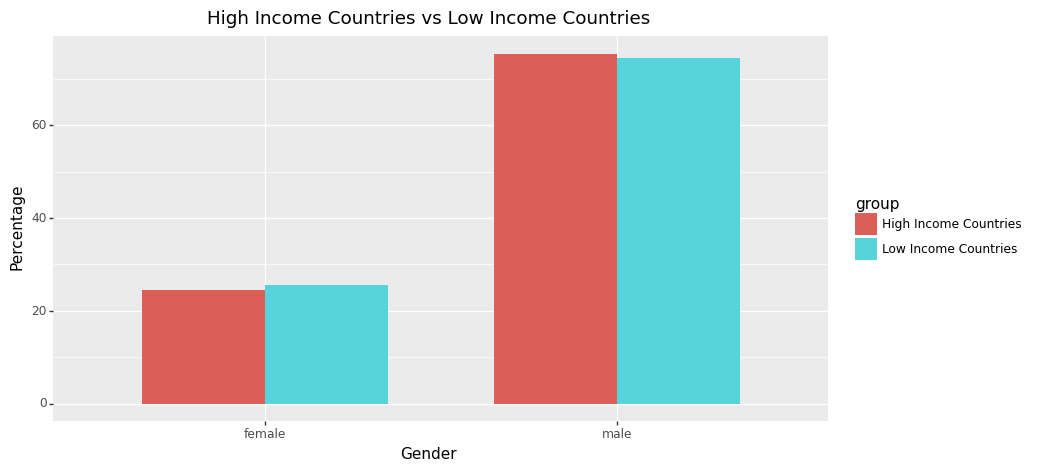

<ggplot: (8780460042162)>

In [63]:
# Create a double bar plot for Income analysis
income_plot_df=pd.concat([gender_df[['high_income_pc']].rename(columns={'high_income_pc':'percentage'})\
                   ,gender_df[['low_income_pc']].rename(columns={'low_income_pc':'percentage'})],axis=0).reset_index()
income_plot_df['group']=['High Income Countries' if i<2 else 'Low Income Countries' for i in range(4)]
ggplot(income_plot_df,aes(x='gender',y='percentage',fill='group'))\
    + geom_bar(stat='identity', position='dodge', width=0.7) \
    + labs(x='Gender', y='Percentage', title='High Income Countries vs Low Income Countries') \
    + theme(figure_size=(10, 5))

In [65]:
# Gender Quotas

quotas=df.query('country in @utils.legal_quotas')
no_quotas=df.query('country not in @utils.legal_quotas')
quotas_df=quotas.groupby('gender').count()[['name']]
no_quotas_df=no_quotas.groupby('gender').count()[['name']]
gender_df=pd.merge(quotas_df, no_quotas_df, how='inner',left_index=True,right_index=True)
gender_df.columns=['quotas','no_quotas']

# Add columns for percentage
gender_df['quotas_pc']=(gender_df['quotas']/gender_df['quotas'].sum()*100).round(2)
gender_df['no_quotas_pc']=(gender_df['no_quotas']/gender_df['no_quotas'].sum()*100).round(2)
gender_df

,quotas,no_quotas,quotas_pc,no_quotas_pc
gender,,,,
female,2564,10905,25.5,21.55
male,7492,39708,74.5,78.45


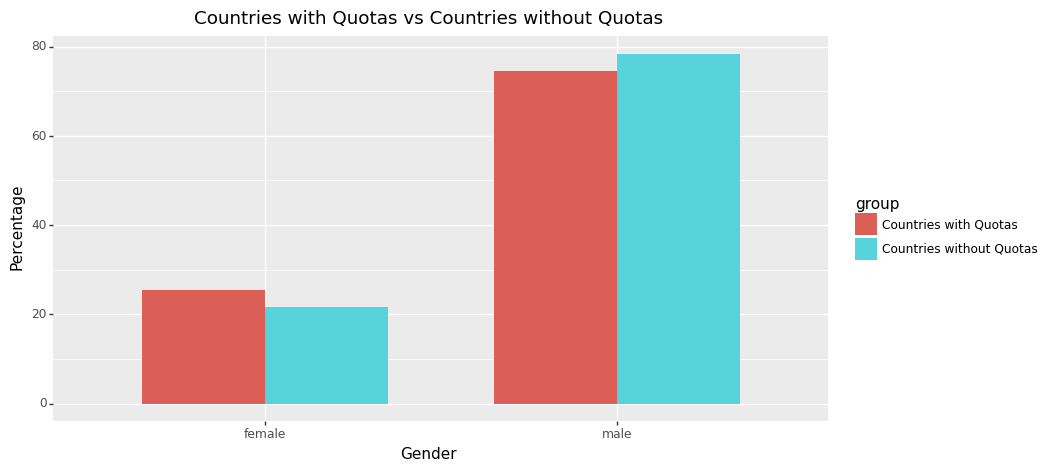

<ggplot: (8780459316484)>

In [66]:
# Create a double bar plot for Quotas analysis
income_plot_df=pd.concat([gender_df[['quotas_pc']].rename(columns={'quotas_pc':'percentage'})\
                   ,gender_df[['no_quotas_pc']].rename(columns={'no_quotas_pc':'percentage'})],axis=0).reset_index()
income_plot_df['group']=['Countries with Quotas' if i<2 else 'Countries without Quotas' for i in range(4)]
ggplot(income_plot_df,aes(x='gender',y='percentage',fill='group'))\
    + geom_bar(stat='identity', position='dodge', width=0.7) \
    + labs(x='Gender', y='Percentage', title='Countries with Quotas vs Countries without Quotas') \
    + theme(figure_size=(10, 5))